In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
from pycaret.utils import version
version()

2.0


In [5]:

from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,1000,10,N
1,france,Multivariate,Association Rule Mining,"InvoiceNo, Description",8557,8,N
2,germany,Multivariate,Association Rule Mining,"InvoiceNo, Description",9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,683,10,N
6,credit,Multivariate,Classification (Binary),default,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,10000,14,N
9,employee,Multivariate,Classification (Binary),left,14999,10,N


In [6]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from pycaret.classification import *
clf1 = setup(data, target = 'species', session_id=123, log_experiment=True, experiment_name='iris1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
3,Original Data,"(150, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Quadratic Discriminant Analysis,0.9709,0.0000,0.9667,0.9767,0.9696,0.9553,0.9592,0.0100
1,Random Forest Classifier,0.9527,0.0000,0.9444,0.9646,0.9487,0.9271,0.9351,0.4681
2,K Neighbors Classifier,0.9518,0.0000,0.9444,0.9620,0.9498,0.9262,0.9325,0.0178
3,Gradient Boosting Classifier,0.9518,0.0000,0.9472,0.9644,0.9482,0.9261,0.9342,0.1566
4,Naive Bayes,0.9427,0.0000,0.9417,0.9583,0.9407,0.9136,0.9225,0.0090
5,Decision Tree Classifier,0.9427,0.0000,0.9361,0.9571,0.9387,0.9122,0.9215,0.0099
6,Extreme Gradient Boosting,0.9427,0.0000,0.9361,0.9571,0.9387,0.9122,0.9215,0.3249
7,CatBoost Classifier,0.9427,0.0000,0.9361,0.9571,0.9387,0.9122,0.9215,4.4352
8,Logistic Regression,0.9336,0.0000,0.9333,0.9474,0.9320,0.9000,0.9078,0.0303
9,Ada Boost Classifier,0.9327,0.0000,0.9250,0.9446,0.9287,0.8968,0.9048,0.1394


In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.0000,0.8056,0.8182,0.8182,0.7250,0.7250
3,0.8182,0.0000,0.8333,0.8909,0.8106,0.7317,0.7695
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.8889,0.9200,0.8956,0.8462,0.8598
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636
8,0.9000,0.0000,0.8889,0.9200,0.8956,0.8462,0.8598
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.8889,0.9273,0.9051,0.8608,0.8721
3,0.8182,0.0000,0.7778,0.8788,0.7909,0.7179,0.7593
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.8889,0.9200,0.8956,0.8462,0.8598
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636
8,0.9000,0.0000,0.8889,0.9200,0.8956,0.8462,0.8598
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8571,0.0000,0.8571,0.9000,0.8503,0.7857,0.8109
2,0.9524,0.0000,0.9524,0.9583,0.9521,0.9286,0.9317
3,0.9524,0.0000,0.9524,0.9583,0.9521,0.9286,0.9317
4,0.9500,0.0000,0.9524,0.9571,0.9500,0.9251,0.9286
Mean,0.9424,0.0000,0.9429,0.9548,0.9409,0.9136,0.9206
SD,0.0466,0.0000,0.0467,0.0319,0.0491,0.0699,0.0611


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [13]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [14]:
ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9711,0.0000,0.9705,0.9734,0.9711,0.9567,0.9579,0.3531
1,Gradient Boosting Classifier,0.9709,0.0000,0.9714,0.9717,0.9709,0.9563,0.9567,0.1625
2,Extra Trees Classifier,0.9518,0.0000,0.9503,0.9581,0.9514,0.9275,0.9310,0.6013
3,Light Gradient Boosting Machine,0.9518,0.0000,0.9512,0.9526,0.9518,0.9277,0.9280,0.0760
4,CatBoost Classifier,0.9518,0.0000,0.9512,0.9553,0.9516,0.9276,0.9295,4.4601
5,Random Forest Classifier,0.9420,0.0000,0.9419,0.9462,0.9418,0.9129,0.9152,0.1569
6,Ada Boost Classifier,0.9420,0.0000,0.9411,0.9461,0.9417,0.9128,0.9151,0.1407


In [15]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.8889,0.9273,0.9051,0.8608,0.8721
3,0.8182,0.0000,0.7778,0.8788,0.7909,0.7179,0.7593
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.8889,0.9200,0.8956,0.8462,0.8598
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636
8,0.9000,0.0000,0.8889,0.9200,0.8956,0.8462,0.8598
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


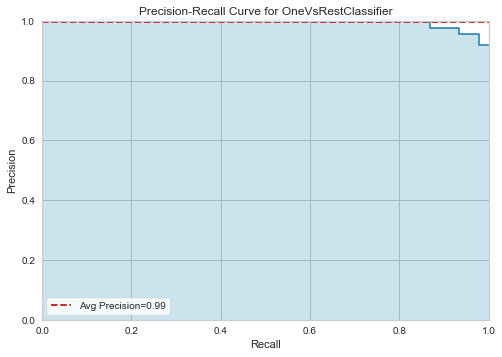

In [17]:
plot_model(rf, plot = 'pr')

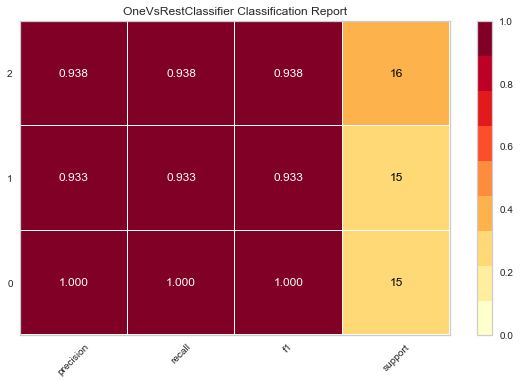

In [18]:
plot_model(rf, plot = 'class_report')


In [19]:
catboost = create_model('catboost', cross_validation=False)

In [22]:
best = automl(optimize = 'Recall')
best

INFO:logs:Creating MLFlow logs
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=OneVsRestClassifier(estimator=QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001),
                    n_jobs=-1), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Quadratic Discriminant Analysis Imported succesfully
INFO:logs:Checking ensemble 

OneVsRestClassifier(estimator=QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001),
                    n_jobs=-1)

In [23]:

pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,One Vs Rest Classifier,0.9565,0,0.9556,0.9614,0.9562,0.9347,0.9373


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.2,3.4,1.4,0.2,0,0,0.8779
1,5.1,3.8,1.5,0.3,0,0,0.9333
2,6.3,3.3,4.7,1.6,1,2,0.5632
3,5.6,2.9,3.6,1.3,1,1,0.7648
4,6.3,2.5,5.0,1.9,2,2,0.5900


In [25]:

new_data = data.copy()
new_data.drop(['species'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,Score
0,5.1,3.5,1.4,0.2,0,1.0
1,4.9,3.0,1.4,0.2,0,1.0
2,4.7,3.2,1.3,0.2,0,1.0
3,4.6,3.1,1.5,0.2,0,1.0
4,5.0,3.6,1.4,0.2,0,1.0


In [26]:
save_model(best, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=OneVsRestClassifier(estimator=QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001),
                    n_jobs=-1), model_name=best-model, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:best-model.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(cate

Transformation Pipeline and Model Succesfully Saved


In [27]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [28]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='species')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [29]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

INFO:logs:Initializing deploy_model()
INFO:logs:deploy_model(model=OneVsRestClassifier(estimator=QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001),
                    n_jobs=-1), model_name=best-aws, authentication={'bucket': 'pycaret-test'}, platform=aws)
ERROR:logs:awscli library not found. pip install awscli to use deploy_model function.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\iamma\.conda\envs\tensorflow_env\lib\site-packages\pycaret\classification.py", line 11331, in deploy_model
    import awscli
ModuleNotFoundError: No module named 'awscli'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\iamma\.conda\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-0165dbc0193c>", line 1, in <module>
    deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})
  File "C:\Users\iamma\.conda\envs\tensorflow_env\lib\site-packages\pycaret\classification.py", line 11334, in deploy_model
    sys.exit("awscli library not found. pip install awscli to use deploy_model function.")
SystemExit: awscli library not found. pip install awscli to use deploy_model function.

During handling of the above exce

SystemExit: awscli library not found. pip install awscli to use deploy_model function.